In [13]:
import sys
import os

PATH1 = os.path.join("..", "simulations","utils")
sys.path.append(PATH1)
from general_utils import *

PATH2 = os.path.join("Jiri_Rohn_s_algorithm") 
sys.path.append(PATH2)

import absvaleqn
import beeckcond
import is_member
import janssonsheuristic
import matplotlib.pyplot as plt
import normform
import numpy as np
import pmatrix
import qzmatrix
import regising
import regsuffcondqz
import scipy
import scipy.optimize
import sgn
import singdetdesc
import vec2mat

from tqdm import tqdm
import datetime
import time

darkorange = (0.804, 0.4, 0)
airforceblue = (0.36, 0.54, 0.66)
metallic_gold = (0.83, 0.69, 0.22)
glaucous_blue = (0.38, 0.51, 0.71)
darkred = (0.804, 0, 0)
black = (0, 0, 1)

now = str(datetime.datetime.now()).replace(":","-").replace(" ","_")[:-7]

### Non hermitian case

In [2]:
alphas = np.linspace(0.001,2,10) #
N = 15 #
nbr_iter = 10 #
phase_transition_value = 1 #
graphics_folder = "" #

In [3]:
start = time.time()

alpha_p_matrix_proba = {}

for alpha in tqdm(alphas):

    p_matrix_result = []
    i = 0

    while i < nbr_iter:

        random_matrix = np.random.normal(loc = 0, scale = 1, size = (N,N)) #
        normalized_matrix =  random_matrix / (alpha * np.sqrt(N))
            
        try:
            pmat = pmatrix.pmatrix( np.eye(N) - normalized_matrix )
            p_matrix_result.append( pmat )
            i += 1
        except Exception as e:
            print("Exception: ", e)

    alpha_p_matrix_proba[alpha] = np.sum( np.array(p_matrix_result).astype(int) ) / nbr_iter
    
end = time.time()

 30%|████████████████████████▉                                                          | 3/10 [00:20<00:00, 25.91it/s]

Exception:  Phase 1 of the simplex method failed to find a feasible solution. The pseudo-objective function evaluates to 1.5e+01 which exceeds the required tolerance of 1e-09 for a solution to be considered 'close enough' to zero to be a basic solution. Consider increasing the tolerance to be greater than 1.5e+01. If this tolerance is unacceptably  large the problem may be infeasible.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:43<00:00, 22.34s/it]


In [4]:
str(datetime.timedelta(seconds = end - start))

'0:03:43.454132'


Montecarlo over 10 estimations,
matrix shape 15x15



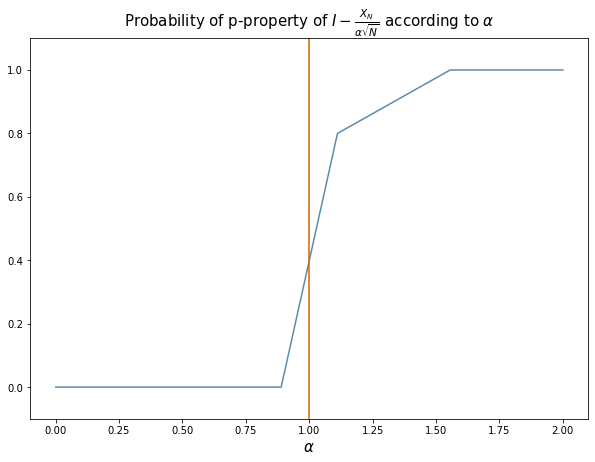

In [5]:
print(f"\nMontecarlo over {nbr_iter} estimations,\nmatrix shape {N}x{N}\n")

plt.figure(figsize=(10,7))
plt.ylim([-0.1,1.1])
plt.xlim([-0.1,2.1])
plt.plot(alpha_p_matrix_proba.keys(), alpha_p_matrix_proba.values(), color = airforceblue)
plt.axvline(x = phase_transition_value, linestyle = "-", color = darkorange)
plt.title(r"Probability of p-property of $I - \frac{X_N}{\alpha \sqrt{N}}$ according to $\alpha$", fontsize = 15)
plt.xlabel(r"$\alpha$", fontsize = 15)
#name_file = f"proba_p_property_alpha_{now}.png"
#plt.savefig(os.path.join(graphics_folder, name_file))
plt.show();

### Hermitian case

In [20]:
alphas = np.linspace(1,3,10) #
N = 15 #
nbr_iter = 10 #
phase_transition_value = 2 #
graphics_folder = "" #

In [21]:
start = time.time()

alpha_p_matrix_proba = {}

for alpha in tqdm(alphas):

    p_matrix_result = []
    i = 0

    while i < nbr_iter:

        random_matrix = get_wigner(loc = 0, scale = 1, size = (N,N)) #
        normalized_matrix =  random_matrix / (alpha * np.sqrt(N))
            
        try:
            pmat = pmatrix.pmatrix( np.eye(N) - normalized_matrix )
            p_matrix_result.append( pmat )
            i += 1
        except Exception as e:
            print("Exception: ", e)

    alpha_p_matrix_proba[alpha] = np.sum( np.array(p_matrix_result).astype(int) ) / nbr_iter
    
end = time.time()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.10it/s]


In [22]:
str(datetime.timedelta(seconds = end - start))

'0:00:00.625300'


Montecarlo over 10 estimations,
matrix shape 15x15



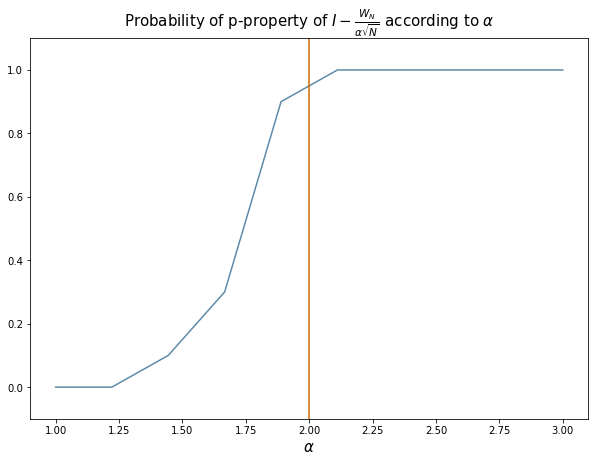

In [23]:
print(f"\nMontecarlo over {nbr_iter} estimations,\nmatrix shape {N}x{N}\n")

plt.figure(figsize=(10,7))
plt.ylim([-0.1,1.1])
plt.xlim([0.9,3.1])
plt.plot(alpha_p_matrix_proba.keys(), alpha_p_matrix_proba.values(), color = airforceblue)
plt.axvline(x = phase_transition_value, linestyle = "-", color = darkorange)
plt.title(r"Probability of p-property of $I - \frac{W_N}{\alpha \sqrt{N}}$ according to $\alpha$", fontsize = 15)
plt.xlabel(r"$\alpha$", fontsize = 15)
#name_file = f"proba_p_property_alpha_{now}.png"
#plt.savefig(os.path.join(graphics_folder, name_file))
plt.show();